In [23]:
import numpy as np
from scipy.stats import weibull_min
import weibull
import sympy as sp
from sympy import *
from sympy.abc import k,l,x,n,K,L,h,o
import matplotlib.pyplot as plt

In [24]:
x, i = symbols("x i")
s = Sum(log(Indexed('x',i)),(i,1,n))
t = Sum(pow(Indexed('x',i)/l,k),(i,1,n))

In [25]:
expr = n*log(k) - k*n*log(l) + (k-1)*s - t
expr

-k*n*log(l) + n*log(k) + (k - 1)*Sum(log(x[i]), (i, 1, n)) - Sum((x[i]/l)**k, (i, 1, n))

In [26]:
first_derivative_k = diff(expr,k)
first_derivative_l = diff(expr,l)

In [27]:
first_derivative_k

-n*log(l) - Sum((x[i]/l)**k*log(x[i]/l), (i, 1, n)) + Sum(log(x[i]), (i, 1, n)) + n/k

In [28]:
first_derivative_l

-k*n/l - Sum(-k*(x[i]/l)**k/l, (i, 1, n))

In [29]:
second_derivative_kk = diff(first_derivative_k, k)
second_derivative_kl = diff(first_derivative_k, l)
second_derivative_lk = diff(first_derivative_l, k)
second_derivative_ll = diff(first_derivative_l, l)

In [30]:
second_derivative_lk

-Sum(-k*(x[i]/l)**k*log(x[i]/l)/l - (x[i]/l)**k/l, (i, 1, n)) - n/l

In [31]:
second_derivative_kl

-Sum(-k*(x[i]/l)**k*log(x[i]/l)/l - (x[i]/l)**k/l, (i, 1, n)) - n/l

In [32]:
second_derivative_kk

-Sum((x[i]/l)**k*log(x[i]/l)**2, (i, 1, n)) - n/k**2

In [33]:
second_derivative_ll

k*n/l**2 - Sum(k**2*(x[i]/l)**k/l**2 + k*(x[i]/l)**k/l**2, (i, 1, n))

In [34]:
first_derivative_k

-n*log(l) - Sum((x[i]/l)**k*log(x[i]/l), (i, 1, n)) + Sum(log(x[i]), (i, 1, n)) + n/k

In [35]:
first_derivative_l

-k*n/l - Sum(-k*(x[i]/l)**k/l, (i, 1, n))

In [36]:
theta_vec = sp.Matrix([k-h, l-o])

In [37]:
theta_vec

Matrix([
[-h + k],
[ l - o]])

In [38]:
J_matrix = sp.Matrix([[-second_derivative_kk, -second_derivative_kl],[-second_derivative_lk, -second_derivative_ll]])

In [39]:
expression = theta_vec.T*J_matrix*theta_vec

In [40]:
expression

Matrix([[(-h + k)*((-h + k)*(Sum((x[i]/l)**k*log(x[i]/l)**2, (i, 1, n)) + n/k**2) + (l - o)*(Sum(-k*(x[i]/l)**k*log(x[i]/l)/l - (x[i]/l)**k/l, (i, 1, n)) + n/l)) + (l - o)*((-h + k)*(Sum(-k*(x[i]/l)**k*log(x[i]/l)/l - (x[i]/l)**k/l, (i, 1, n)) + n/l) + (l - o)*(-k*n/l**2 + Sum(k**2*(x[i]/l)**k/l**2 + k*(x[i]/l)**k/l**2, (i, 1, n))))]])

In [41]:
from sympy import Matrix, print_latex

print_latex(expression)

\left[\begin{matrix}\left(- h + k\right) \left(\left(- h + k\right) \left(\sum_{i=1}^{n} \left(\frac{{x}_{i}}{l}\right)^{k} \log{\left(\frac{{x}_{i}}{l} \right)}^{2} + \frac{n}{k^{2}}\right) + \left(l - o\right) \left(\sum_{i=1}^{n} \left(- \frac{k \left(\frac{{x}_{i}}{l}\right)^{k} \log{\left(\frac{{x}_{i}}{l} \right)}}{l} - \frac{\left(\frac{{x}_{i}}{l}\right)^{k}}{l}\right) + \frac{n}{l}\right)\right) + \left(l - o\right) \left(\left(- h + k\right) \left(\sum_{i=1}^{n} \left(- \frac{k \left(\frac{{x}_{i}}{l}\right)^{k} \log{\left(\frac{{x}_{i}}{l} \right)}}{l} - \frac{\left(\frac{{x}_{i}}{l}\right)^{k}}{l}\right) + \frac{n}{l}\right) + \left(l - o\right) \left(- \frac{k n}{l^{2}} + \sum_{i=1}^{n} \left(\frac{k^{2} \left(\frac{{x}_{i}}{l}\right)^{k}}{l^{2}} + \frac{k \left(\frac{{x}_{i}}{l}\right)^{k}}{l^{2}}\right)\right)\right)\end{matrix}\right]


In [42]:
vals = np.linspace(0, 100)
heights = weibull_min.pdf(vals, loc = 0, c = 5.976913010189012, scale = 181.40556859870227)
    

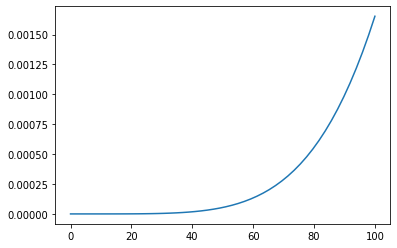

In [43]:
plt.plot(vals, heights)